In [3]:
import pandas as pd
df = pd.read_csv(
    "train_data.csv",
    usecols=['overall', 'reviewText'],
    dtype={'overall': 'int8'}
)

df = df.sample(200000, random_state=42).reset_index(drop=True)


In [4]:
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df['sentiment'] = df['overall'].apply(label_sentiment)


In [5]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # فقط حروف انگلیسی
    words = text.split()
    words = [w for w in words if w not in stopwords and len(w) > 2]
    return " ".join(words)

df['clean_text'] = df['reviewText'].apply(clean_text)


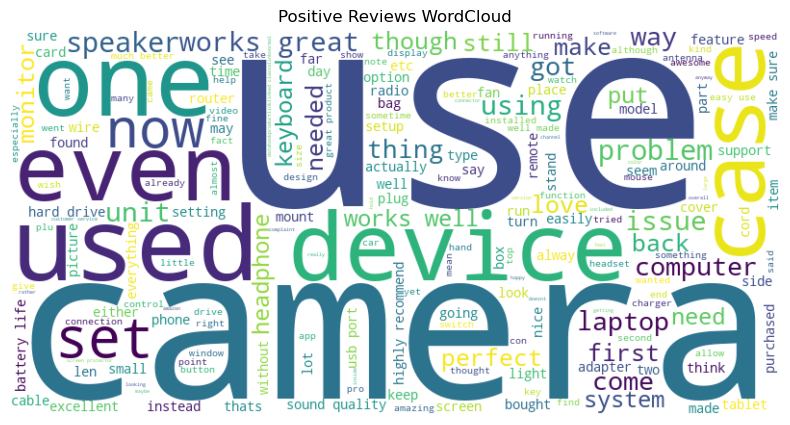

In [7]:
positive_text = " ".join(df[df['sentiment']=='positive']['clean_text'])

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()


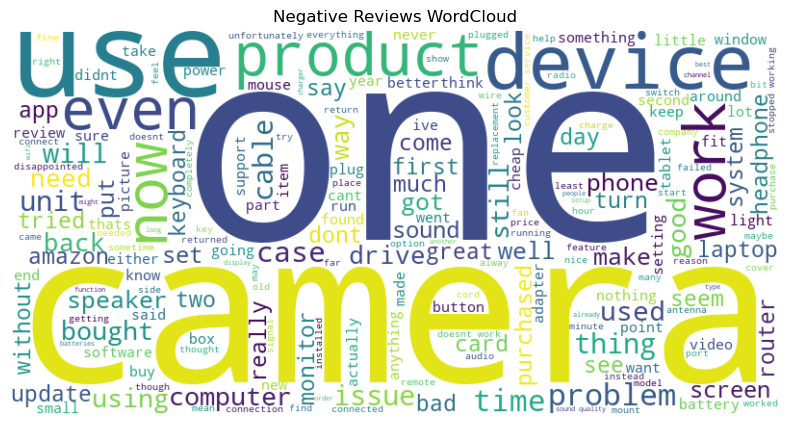

In [8]:
negative_text = " ".join(df[df['sentiment']=='negative']['clean_text'])

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()


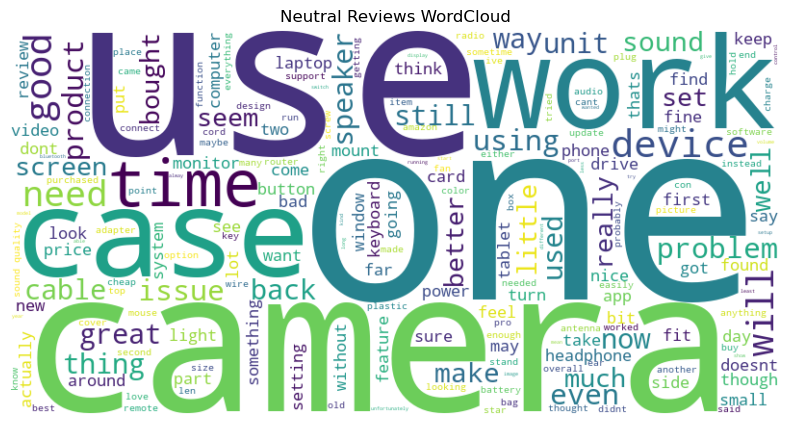

In [9]:
neutral_text = " ".join(df[df['sentiment']=='neutral']['clean_text'])

wordcloud_neu = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(neutral_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Reviews WordCloud")
plt.show()
